In [2]:
require(tidyverse)
require(data.table)
require(ggplot2)

require(chromVAR)
require(SummarizedExperiment)
require(RColorBrewer)
require(extrafont)  # fonts 
# https://blog.revolutionanalytics.com/2012/09/how-to-use-your-favorite-fonts-in-r-charts.html
suppressMessages(loadfonts())
require(ggthemes)
# #https://rpubs.com/Koundy/71792 theme_Publication
require(ComplexHeatmap)
cols.hm.avg.tf <- colorRampPalette(c(rgb(249, 249, 212, maxColorValue = 255), rgb(60, 
    181, 195, maxColorValue = 255), rgb(30, 35, 86, maxColorValue = 255)), space = "Lab")

require(ggpubr)
require(gghighlight)
require(pheatmap)

theme_pubr<- function (base_size = 11, base_family = "Arial") 
{
    theme_foundation() + theme(line = element_line(colour = "black", 
        lineend = "round", linetype = "solid"), rect = element_rect(fill = "white", 
        colour = "black", linetype = "solid"), text = element_text(colour = "black", 
        face = "plain", family = base_family, size = base_size, 
        vjust = 0.5, hjust = 0.5, lineheight = 0.5), panel.background = element_blank(), 
        plot.background = element_blank(), panel.border = element_rect(colour = "black", 
            fill = NA), panel.grid = element_blank(), strip.background = element_rect(colour = NA), 
        legend.key = element_rect(colour = NA), title = element_text(size = rel(1)), 
        plot.title = element_text(size = rel(1.2), face = "bold"), 
        strip.text = element_text(), axis.ticks.length = unit(1, 
    "mm"))
}
require(ggrepel)

## 1.1 prom valcano

In [39]:
pd.fig2_prom_ttest_res <- fread("../figures/Fig2/subfigs/fig_2.prom.sub_vs_sub.fisher.csv")

pd.fig2_prom_ttest_res %>% distinct %>% nrow
pd.fig2_prom_ttest_res %>% select(-peak) %>% distinct %>% nrow
pd.fig2_prom_ttest_res <- pd.fig2_prom_ttest_res %>% select(-peak) %>% distinct %>% 
    separate(gene_transcript,into = c('gene','tr.idx'),sep = '_')
pd.fig2_prom_ttest_res%>%head(1)

[1] 55595

[1] 53479

gene,tr.idx,pval,odds,FDR,padj.Bonferroni,FDR.BY,percent_open_state1,percent_open_state2,celltype
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
LOXL4,9209,0.03035653,1.312778,0.07060184,1,0.7329348,7.532267,5.842259,alpha


### 1.1.1 beta 

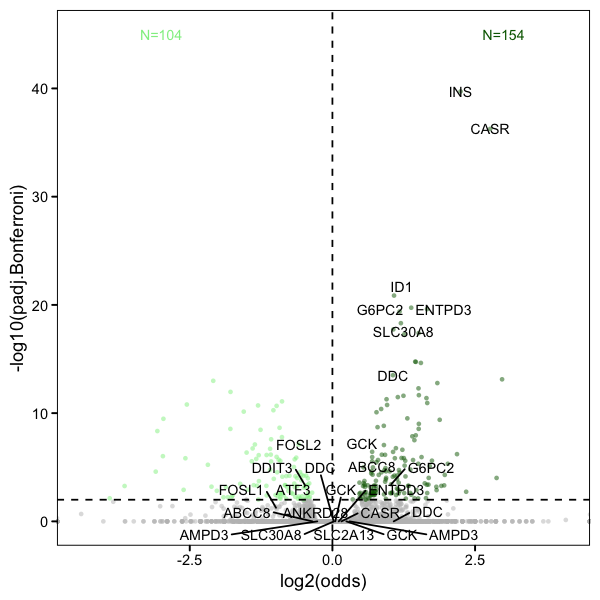

In [50]:
options(repr.plot.width = 5, repr.plot.height = 5)
genes_anno <- c("SLC2A13", "PDE4DIP", "AMPD3", "ANKRD28", "FOSL2", "DDIT3", "ATF3", 
    "FOSL1", "ABCC8", "INS", "SLC30A8", "DDC", "CASR", "ID1",'GCK','G6PC2','ENTPD3')


pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "beta") %>% mutate(ty = ifelse(padj.Bonferroni >= 
    0.01, 0, ifelse(odds < 1, 1, 2)))
pd %>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + geom_point(aes(col = as.factor(ty)), 
    size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + theme_pubr() + 
    theme(axis.ticks.length = unit(1, "mm")) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2) + geom_vline(xintercept = 0, color = "black", linetype = 2) + theme(legend.position = "none") + 
    scale_color_manual(values = c(`0` = "grey", `2` = "darkgreen", `1` = "lightgreen")) + 
    annotate(geom = "text", x = -3, y = 45, label = paste0("N=", table(pd$ty)[["1"]]), 
        size = 3, color = "lightgreen", family = "Arial") + annotate(geom = "text", 
    x = 3, y = 45, label = paste0("N=", table(pd$ty)[["2"]]), size = 3, color = "darkgreen", 
    family = "Arial") + geom_text_repel(data = pd %>% filter(gene %in% genes_anno), 
    aes(label = gene), point.padding = NA,size=3)

# ggsave(filename = '/Users/frank/Dropbox
# (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_beta_volcano.pdf',width
# = 2.5,height = 2.5,useDingbats=F)

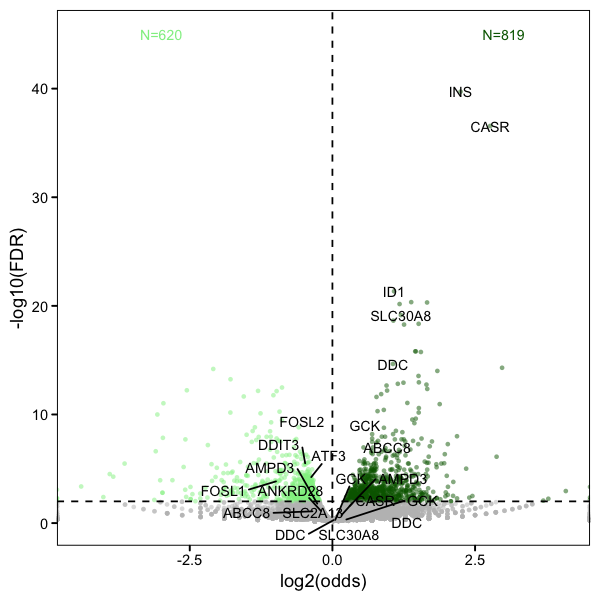

In [48]:
options(repr.plot.width = 5, repr.plot.height = 5)
genes_anno <- c("SLC2A13", "PDE4DIP", "AMPD3", "ANKRD28", "FOSL2", "DDIT3", "ATF3", 
    "FOSL1", "ABCC8", "INS", "SLC30A8", "DDC", "CASR", "ID1",'GCK')

pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "beta") %>% mutate(ty = ifelse(FDR >= 
    0.01, 0, ifelse(odds < 1, 1, 2)))
pd %>% ggplot(aes(log2(odds), -log10(FDR))) + geom_point(aes(col = as.factor(ty)), 
    size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + theme_pubr() + 
    theme(axis.ticks.length = unit(1, "mm")) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2) + geom_vline(xintercept = 0, color = "black", linetype = 2) + theme(legend.position = "none") + 
    scale_color_manual(values = c(`0` = "grey", `2` = "darkgreen", `1` = "lightgreen")) + 
    annotate(geom = "text", x = -3, y = 45, label = paste0("N=", table(pd$ty)[["1"]]), 
        size = 3, color = "lightgreen", family = "Arial") + annotate(geom = "text", 
    x = 3, y = 45, label = paste0("N=", table(pd$ty)[["2"]]), size = 3, color = "darkgreen", 
    family = "Arial") + geom_text_repel(data = pd %>% filter(gene %in% genes_anno), 
    aes(label = gene), point.padding = NA, size = 3)

# ggsave(filename = '/Users/frank/Dropbox
# (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_beta_volcano.pdf',width
# = 2.5,height = 2.5,useDingbats=F)

### 1.1.2 alpha

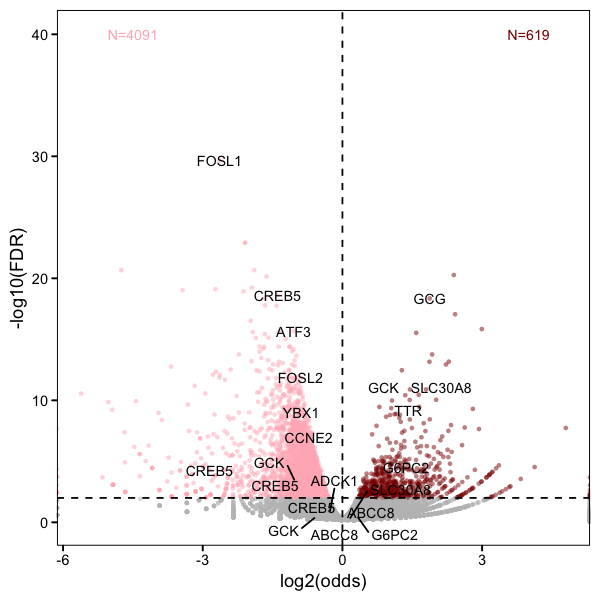

In [52]:
options(repr.plot.width = 5, repr.plot.height = 5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "alpha") %>% mutate(ty = ifelse(FDR >= 
    0.01, 0, ifelse(odds < 1, 1, 2)))
genes_anno <- c("FOSL1", "CREB5", "ATF3", "FOSL2", "YBX1", "CCNE2", "ABCC8", "ADCK1", 
    "GCG", "TTR", "GCK", "SLC30A8", "G6PC2")

pd %>% ggplot(aes(log2(odds), -log10(FDR))) + geom_point(aes(col = as.factor(ty)), 
    size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + theme_pubr() + 
    theme(axis.ticks.length = unit(1, "mm")) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2) + geom_vline(xintercept = 0, color = "black", linetype = 2) + theme(legend.position = "none") + 
    scale_color_manual(values = c(`0` = "grey", `2` = "darkred", `1` = "lightpink")) + 
    annotate(geom = "text", x = -4.5, y = 40, label = paste0("N=", table(pd$ty)[["1"]]), 
        size = 3, color = "lightpink", family = "Arial") + annotate(geom = "text", 
    x = 4, y = 40, label = paste0("N=", table(pd$ty)[["2"]]), size = 3, color = "darkred", 
    family = "Arial") + geom_text_repel(data = pd %>% filter(gene %in% genes_anno), 
    aes(label = gene), point.padding = NA, size = 3)

# ggsave(filename = '/Users/frank/Dropbox
# (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_alpha_volcano.pdf',width
# = 2.5,height = 2.5,useDingbats=F) ggarrange(p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

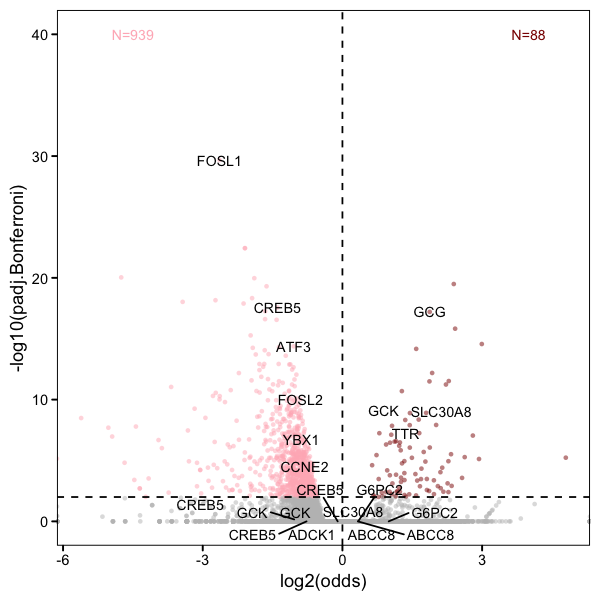

In [53]:
options(repr.plot.width = 5, repr.plot.height = 5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "alpha") %>% mutate(ty = ifelse(padj.Bonferroni >= 
    0.01, 0, ifelse(odds < 1, 1, 2))) 
pd%>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(aes(col = as.factor(ty)), size = 1, alpha = 0.5,shape=16) + coord_cartesian(expand = T) + 
    theme_pubr() + theme(axis.ticks.length = unit(1, 
    "mm")) + geom_hline(yintercept = 2, color = "black", linetype = 2) + geom_vline(xintercept = 0, 
    color = "black", linetype = 2) + theme(legend.position = "none") + scale_color_manual(values = c('0'="grey", 
    "2"="darkred","1"="lightpink")) + annotate(geom = "text", x = -4.5, y = 40, label =paste0("N=",table(pd$ty)[["1"]]), 
    size = 3,color="lightpink",family = "Arial")+annotate(geom = "text", x = 4, y = 40, label =paste0("N=",table(pd$ty)[["2"]]), 
    size = 3,color="darkred",family = "Arial")+ geom_text_repel(data = pd %>% filter(gene %in% genes_anno), 
    aes(label = gene), point.padding = NA, size = 3)

#ggsave(filename = "/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_alpha_volcano.pdf",width = 2.5,height = 2.5,useDingbats=F)
# ggarrange(p3 %+% subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

### 1.1.3 delta

In [34]:
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "delta") %>% mutate(ty = ifelse(pval >= 
    0.01, 0, ifelse(odds < 1, 1, 2)))
cat("range for padj.Bonferroni", range(pd$padj.Bonferroni),'\n')
cat("range for FDR",range(pd$FDR),'\n')
cat("range for pval",range(pd$pval),'\n')
cat("range for type1_frac",base::range(pd$type1_frac[is.finite(pd$type1_frac)]),'\n')
cat("range for type2_frac",base::range(pd$type2_frac[is.finite(pd$type2_frac)],finite = T),'\n')
head(pd %>% filter(ty==2))

range for padj.Bonferroni 0.000119617 1 
range for FDR 7.346044e-05 0.6954803 
range for pval 6.931504e-09 0.6954803 


Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”

range for type1_frac Inf -Inf 


Warning message in min(x, na.rm = na.rm):
“no non-missing arguments to min; returning Inf”Warning message in max(x, na.rm = na.rm):
“no non-missing arguments to max; returning -Inf”

range for type2_frac Inf -Inf 


gene_transcript,pval,odds,FDR,padj.Bonferroni,FDR.BY,percent_open_state1,percent_open_state2,celltype,ty
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
TMEM72_8029,0.002595720,3.581938,0.05220785,1,0.5394751,7.322176,2.155172,delta,2
PDE6C_9023,0.008392047,2.880886,0.08819826,1,0.9113719,7.112971,2.586207,delta,2
CASP4_14415,0.006641505,2.624006,0.07824543,1,0.8085270,8.577406,3.448276,delta,2
DHRS2_22021,0.001872355,2.609297,0.04413055,1,0.4560105,11.506276,4.741379,delta,2
USH2A_6527,0.006527872,4.206315,0.07805577,1,0.8065673,5.230126,1.293103,delta,2
AC079354.1_48379,0.004791682,4.384029,0.06899667,1,0.7129577,5.439331,1.293103,delta,2


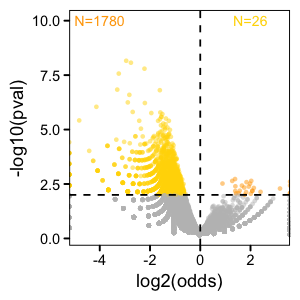

In [26]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)

pd %>% ggplot(aes(log2(odds), -log10(pval))) + geom_point(aes(col = as.factor(ty)), 
    size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + theme_pubr() + 
    theme(axis.ticks.length = unit(1, "mm")) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2) + geom_vline(xintercept = 0, color = "black", linetype = 2) + theme(legend.position = "none") + 
    scale_color_manual(values = c(`0` = "grey", `2` = "orange", `1` = "gold")) + 
    annotate(geom = "text", x = -4, y = 10, label = paste0("N=", table(pd$ty)[["1"]]), 
        size = 3, color = "orange", family = "Arial") + annotate(geom = "text", 
    x = 2, y = 10, label = paste0("N=", table(pd$ty)[["2"]]), size = 3, color = "gold", 
    family = "Arial")

# ggsave(filename = '/Users/frank/Dropbox
# (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_alpha_volcano.pdf',width
# = 2.5,height = 2.5,useDingbats=F) ggarrange(p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

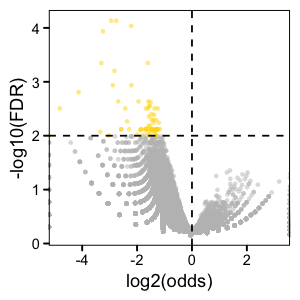

In [19]:
options(repr.plot.width = 2.5, repr.plot.height = 2.5)
pd <- pd.fig2_prom_ttest_res %>% filter(celltype == "delta") %>% mutate(ty = ifelse(FDR >= 
    0.01, 0, ifelse(odds < 1, 1, 2)))
pd %>% ggplot(aes(log2(odds), -log10(FDR))) + geom_point(aes(col = as.factor(ty)), 
    size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + theme_pubr() + 
    theme(axis.ticks.length = unit(1, "mm")) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2) + geom_vline(xintercept = 0, color = "black", linetype = 2) + theme(legend.position = "none") + 
    scale_color_manual(values = c(`0` = "grey", `2` = "orange", `1` = "gold")) #+ 
    annotate(geom = "text", x = -4.5, y = 40, label = paste0("N=", table(pd$ty)[["1"]]), 
        size = 3, color = "orange", family = "Arial") + annotate(geom = "text", 
    x = 4, y = 40, label = paste0("N=", table(pd$ty)[["2"]]), size = 3, color = "gold", 
    family = "Arial")

# ggsave(filename = '/Users/frank/Dropbox
# (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/fig2/fig_2C.prom_alpha_volcano.pdf',width
# = 2.5,height = 2.5,useDingbats=F) ggarrange(p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'alpha'), p3 %+%
# subset(pd.fig2_prom_ttest_res, celltype == 'beta'),ncol=2)

### 1.1.3 alpha + beta: annotation

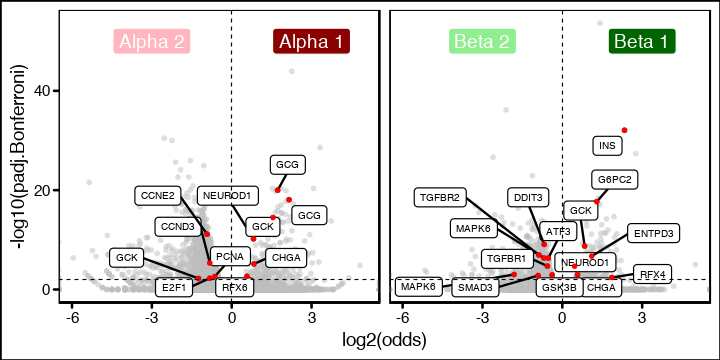

In [180]:

feature.glist <- list(alpha = list(alpha1 = c("CHGA", "GCG", "GCK", "NEUROD1", "RFX6"), 
    alpha2 = c("PCNA", "CCND3", "CCNE2", "E2F1")), beta = list(beta2 = c("ATF3", 
    "DDIT3", "FOXO1.", "TGFBR1", "TGFBR2", "SMAD3", "GSK3B", "MAPK6"), beta1 = c("INS", 
    "CHGA", "G6PC2", "GCK", "RFX4", "NEUROD1", "ENTPD3")))

p.base <- pd.fig2_prom_ttest_res %>% ggplot(aes(log2(odds), -log10(padj.Bonferroni))) + 
    geom_point(size = 1, alpha = 0.5, shape = 16) + coord_cartesian(expand = T) + 
    theme_base(base_size = 11, base_family = "Arial") + theme(axis.ticks.length = unit(1, 
    "mm"))

options(repr.plot.width = 6, repr.plot.height = 3)

p.base + gghighlight(((Gene %in% unlist(feature.glist$alpha) & celltype == "alpha") | 
    (Gene %in% unlist(feature.glist$beta) & celltype == "beta")) & (padj.Bonferroni < 
    0.01), label_key = Gene, label_params = list(size = 2)) + geom_point(col = "red", 
    size = 0.5) + geom_hline(yintercept = 2, color = "black", linetype = 2, size = .25) + 
    geom_vline(xintercept = 0, color = "black", linetype = 2, size = .25) + facet_wrap(~celltype) + 
    theme(strip.background = element_blank(), strip.text.x = element_blank()) + geom_label(data = data.frame(odds = c(2^-3, 
    2^3, 2^-3, 2^3), padj.Bonferroni = 1e-50, labels = c("Alpha 2", "Alpha 1", "Beta 2", 
    "Beta 1"), celltype = c("alpha", "alpha", "beta", "beta")), aes(label = labels, 
    fill = labels), colour = "white") + scale_fill_manual(values = c(`Alpha 2` = "lightpink", 
    `Alpha 1` = "darkred", `Beta 2` = "lightgreen", `Beta 1` = "darkgreen"))

ggsave(filename = "fig_s.prom_volcano_anno_bio.pdf", width = 6, height = 3, useDingbats = F)


Coordinate system already present. Adding new coordinate system, which will replace the existing one.


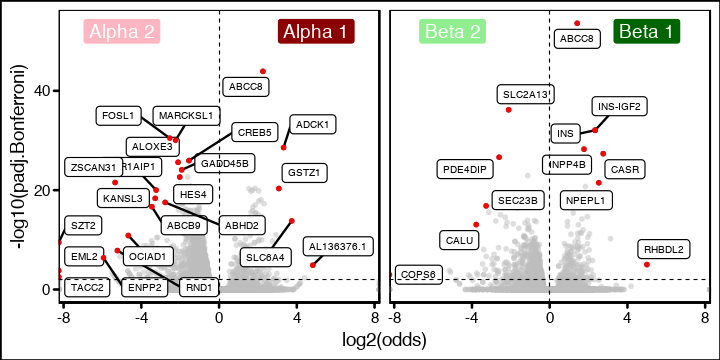

In [185]:
p.base + gghighlight(((-log10(padj.Bonferroni) - 4.5 * log2(odds) - 30 > 0) | (-log10(padj.Bonferroni) + 
    7.5 * log2(odds) - 40 > 0)) & padj.Bonferroni < 0.01, label_key = Gene, label_params = list(size = 2)) + 
    geom_point(col = "red", size = 0.5) + geom_hline(yintercept = 2, color = "black", 
    linetype = 2, size = 0.25) + geom_vline(xintercept = 0, color = "black", linetype = 2, 
    size = 0.25) + facet_wrap(~celltype) + theme(strip.background = element_blank(), 
    strip.text.x = element_blank()) + geom_label(data = data.frame(odds = c(2^-5, 
    2^5, 2^-5, 2^5), padj.Bonferroni = 1e-52, labels = c("Alpha 2", "Alpha 1", "Beta 2", 
    "Beta 1"), celltype = c("alpha", "alpha", "beta", "beta")), aes(label = labels, 
    fill = labels), colour = "white") + scale_fill_manual(values = c(`Alpha 2` = "lightpink", 
    `Alpha 1` = "darkred", `Beta 2` = "lightgreen", `Beta 1` = "darkgreen")) + coord_cartesian(xlim = c(-7.5, 
    7.5))

ggsave(filename = "fig_s.prom_volcano_anno_outliner.pdf", width = 6, height = 3, 
    useDingbats = F)

### 1.4 delta

In [23]:
pd <- fread('../dat/1901/res.transcript_level_delta.csv')
head(pd)

V1,pval,odds,type1_frac,type2_frac,FDR,padj.Bonferroni,FDR.BY
SAMD11_7,0.1439338,0.2937532,0.01744186,0.05714286,0.7106693,1,1
SAMD11_8,0.7417201,Inf,0.00872093,0.00000000,0.7682294,1,1
SAMD11_13,0.6343316,0.9656582,0.02761628,0.02857143,0.7140624,1,1
SAMD11_14,0.3046540,0.6067625,0.05377907,0.08571429,0.7106693,1,1
NOC2L_19,0.2425178,Inf,0.04069767,0.00000000,0.7106693,1,1
PLEKHN1_27,0.3289739,0.3503028,0.01017442,0.02857143,0.7106693,1,1


In [24]:
cat("range for padj.Bonferroni", range(pd$padj.Bonferroni),'\n')
cat("range for FDR",range(pd$FDR),'\n')
cat("range for pval",range(pd$pval),'\n')
cat("range for type1_frac",range(pd$type1_frac),'\n')
cat("range for type2_frac",range(pd$type2_frac),'\n')
head(pd %>% filter(ty==2))

range for padj.Bonferroni 0.309014 1 
range for FDR 0.1128344 0.9054609 
range for pval 1.666113e-05 0.9054609 
range for type1_frac 0 0.431686 
range for type2_frac 0 0.6285714 


V1,pval,odds,type1_frac,type2_frac,FDR,padj.Bonferroni,FDR.BY,ty
KDM4A_3691,0.007537498,Inf,0.1337209,0.00000000,0.5152482,1,1,2
KCNH1_10699,0.008939947,Inf,0.1293605,0.00000000,0.5490371,1,1,2
CDCA3_25805,0.001141532,10.53872,0.2369186,0.02857143,0.2866283,1,1,2
USP5_25805,0.001141532,10.53872,0.2369186,0.02857143,0.2866283,1,1,2
PYROXD1_26784,0.007537498,Inf,0.1337209,0.00000000,0.5152482,1,1,2
MTMR6_33599,0.009461444,Inf,0.1279070,0.00000000,0.5570838,1,1,2


## 1.2 prom GOterm

In [37]:
ct <- "alpha1"
fn = paste0("../dat/1901/", ct, ".EnrichR.BP.100_less.csv")
head(fread(fn),1)
#(fread(fn)     %>% arrange(P.value))[, c("Term", "P.value", "n.hit", "n.all", "Odds.Ratio", 
#    "Genes")] %>% mutate(glists = ct)

Term,n.hit,n.all,P.value,Adjusted.P.value,Combined.Score,Genes
regulation of peptide hormone secretion (GO:0090276),7,74,5.717295e-06,0.002041074,22.22216,NEUROD1;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7


In [41]:
head(do.call(rbind, lapply(c("alpha1", "alpha2", "beta1", "beta2", "delta1", "delta2"), 
    function(ct) {
        fn = paste0("../dat/1901/", ct, ".EnrichR.BP.100_less.csv")
        (fread(fn) %>% arrange(P.value))[, c("Term", "P.value", "n.hit", "n.all", 
             "Genes")] %>% mutate(glists = ct)
    })),1)
go.res <- do.call(rbind, lapply(c("alpha1", "alpha2", "beta1", "beta2", "delta1", "delta2"), 
    function(ct) {
        fn = paste0("../dat/1901/", ct, ".EnrichR.BP.100_less.csv")
        (fread(fn) %>% arrange(P.value))[, c("Term", "P.value", "n.hit", "n.all", 
             "Genes")] %>% mutate(glists = ct)
    }))
fwrite(go.res,'../dat/1908/go.res.csv')
system('open ../dat/1908/go.res.csv')

Term,P.value,n.hit,n.all,Genes,glists
regulation of insulin secretion (GO:0050796),4.004249e-06,8,99,NEUROD1;SLC30A8;RFX6;ABCC8;GCG;KCNA5;GCK;SYT7,alpha1


In [83]:
pd.go.res <- sapply(c("alpha1", "alpha2", "beta1", "beta2"), function(ct) {
    fn = paste0("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/", 
        ct, ".EnrichR.BP.100less.csv")
    fread(fn)
}, simplify = F, USE.NAMES = T)

In [99]:
.all <=150) %>% arrange(Adjusted.P.value) %>% 
        top_n(-10, Adjusted.P.value))[1:2,c(1,5)]%>%mutate(glists=ct))

Term,Adjusted.P.value,glists
regulation of protein secretion (GO:0050708),0.0008138935,alpha1
regulation of peptide hormone secretion (GO:0090276),0.0020410744,alpha1


In [101]:
fwrite(pd,file = '../dat/figdata/fig2b_goterm.csv')
system("open ../dat/figdata/fig2b_goterm.csv ")

In [174]:
pd <- fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2b_goterm.csv") %>% 
    mutate(glists = factor(glists, levels = c("alpha2", "alpha1", "beta2", "beta1")))%>%
    group_by(glists)%>%arrange(Adjusted.P.value)%>%mutate(x=c(1,2))
pd

Term,Adjusted.P.value,glists,x
regulation of insulin secretion (GO:0050796),0.000003270,beta1,1
response to glucose (GO:0009749),0.000071800,beta1,2
protein modification (GO:0070646),0.000623640,alpha2,1
protein secretion (GO:0050708),0.000813893,alpha1,1
G2/M transition of mitotic cell cycle (GO:0010389),0.001170023,alpha2,2
peptide hormone secretion (GO:0090276),0.002041074,alpha1,2
response to stress (GO:0036003),0.046292878,beta2,1
response to insulin (GO:0032868),0.064444163,beta2,2


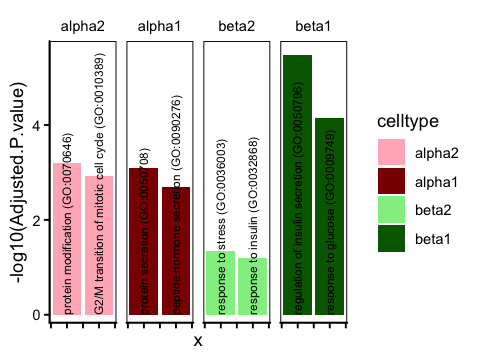

In [175]:
options(repr.plot.width = 4, repr.plot.height = 3)
p <- ggplot(pd, aes(x, -log10(Adjusted.P.value))) + geom_bar(stat = "identity", aes(fill = glists)) + 
    theme_pubr() + theme(axis.text.x = element_blank(), axis.line = element_line(colour = "black")) + 
    geom_text(aes(label = Term), y = 0.01, hjust = 0, color = "black", size = 2.5, 
        angle = 90) + facet_grid(. ~ glists, scales = "free_x") + scale_fill_manual(values = c("lightpink", 
    "darkred", "lightgreen", "darkgreen"), name = "celltype") + coord_cartesian(ylim=c(.1,5.5))
print(p)
ggsave( p+ylab("")+theme(legend.position = "none",strip.text = element_blank()),
       filename = '/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/fig2B_GO.pdf',
 width = 4, height = 2)
#+ coord_flip(expand = F)

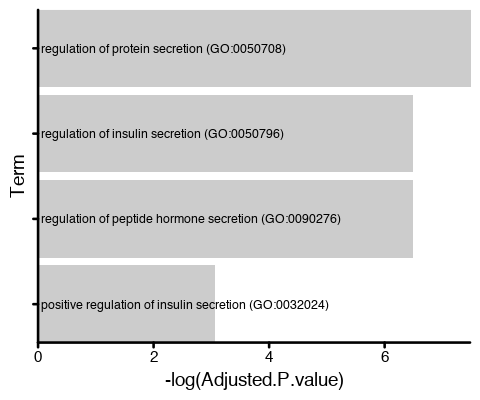

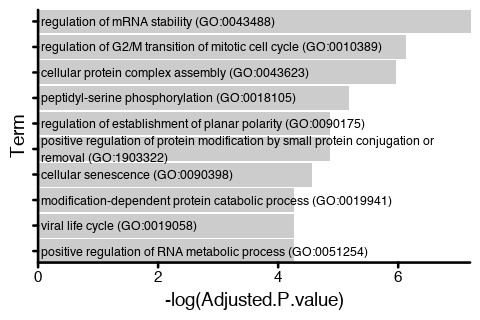

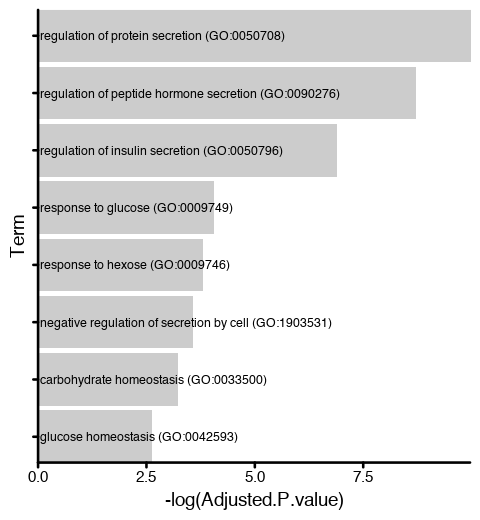

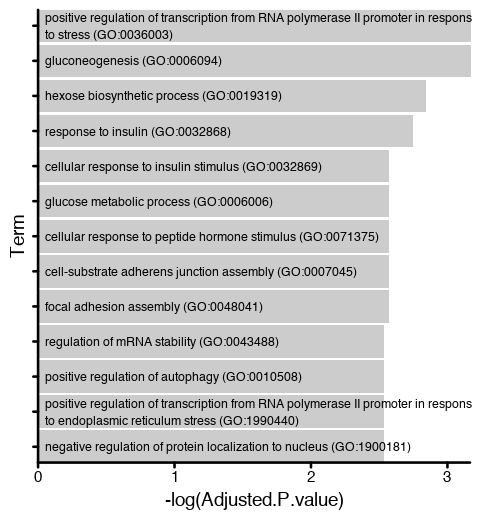

In [304]:

for (ct in c("alpha1", "alpha2", "beta1", "beta2")) {
    pd <- pd.go.res[[ct]] %>% filter(Adjusted.P.value <= 0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    print(p)
    ggsave(filename =paste0("fig_s.prom_",ct,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}


if (F) {
    pd <- pd.go.res$alpha2 %>% filter(Adjusted.P.value <= 0.1) %>% arrange(Combined.Score) %>% 
        top_n(10, Combined.Score)
    l <- nrow(pd)
    ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, 60), levels = (stringr::str_wrap(Term, 
        60)))), aes(Term, Combined.Score)) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = T) + theme_pubr() + theme(axis.text.y = element_blank()) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
}

## 1.3 prom GSEA 

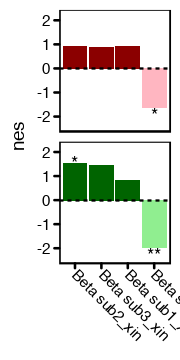

In [93]:
pd.gsea <- rbind(data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/Xin/GSEA_alpha_Xin_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/Xin/GSEA_beta_Xin_seed1000.csv"), 
    celltype = "beta")) %>% filter(grepl("_xin", Term))
pd.gsea$Term <- factor(pd.gsea$Term, levels = (pd.gsea %>% filter(celltype == "beta") %>% 
    arrange(desc(nes)))$Term)
# 
pd.gsea <- pd.gsea %>% mutate(x = gsub("Beta sub([0-9]+).*$", "\\1", Term)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>% mutate(glists = "Xin")
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))


options(repr.plot.width = 1.5, repr.plot.height = 3)

ggplot(pd.gsea, aes(Term, nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ .)+ylim(c(-2.4,2.2)) + theme_pubr() + scale_fill_manual(values = c("darkred", 
    "lightpink", "darkgreen", "lightgreen"), name = "celltype") + theme(strip.text = element_blank(),legend.position = "none",legend.text = element_text(family = "Arial", 
    size = 9), legend.title = element_text(family = "Arial", size = 10), axis.title.x = element_blank(), 
    axis.text.x = element_text(angle = -45, hjust = 0, vjust = 0.5)) + geom_hline(yintercept = 0, 
    linetype = 2) + geom_text(data = pd.gsea.label,aes(label = label))

pd.gsea <- pd.gsea %>% rbind(rbind(data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/our/GSEA_alpha_res_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("/Users/frank/Dropbox (UCSD_Epigenomics)/projects/islet/slides/2019-03-12_figs/GSEA/our/GSEA_beta_res_seed1000.csv"), 
    celltype = "beta")) %>% mutate(x = c(1, 2, 1, 2)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>% mutate(glists = "ours"))
pd.gsea <- pd.gsea %>% rbind(rbind(data.frame(fread("../dat/figdata/GSEA_alpha_res_final.csv") %>% 
    filter(grepl("Mawla", Term) | grepl("mu", Term)), celltype = "alpha"), data.frame(fread("../dat/figdata/GSEA_beta_res_final.csv") %>% 
    filter(grepl("Mawla", Term) | grepl("mu", Term)), celltype = "beta")) %>% arrange(Term, 
    celltype) %>% mutate(x = c(1, 1, 2, 2, 1, 1, 2, 2)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>% mutate(glists = rep(c("Mawla", 
    "Patchseq"), each = 4)))

pd.gsea <- pd.gsea %>% mutate(glists = factor(glists, levels = rev(c("Mawla", "Patchseq", 
    "Xin", "ours"))))
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))

pd.gsea <- rbind(data.frame(fread("../dat/figdata/GSEA_alpha_Xin_seed1000.csv"), 
    celltype = "alpha"), data.frame(fread("../dat/figdata/GSEA_beta_Xin_seed1000.csv"), 
    celltype = "beta")) %>% filter(grepl("_xin", Term))

pd.gsea <- pd.gsea %>% mutate(x = gsub("Beta sub([0-9]+).*$", "\\1", Term)) %>% mutate(cate = ifelse(nes > 
    0, 1, 2), label = ifelse(fdr <= 0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% 
    unite(cate, c("celltype", "cate"), sep = "_", remove = F) %>% mutate(glists = "Xin")
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))

pd.gsea%>%arrange(celltype,x)

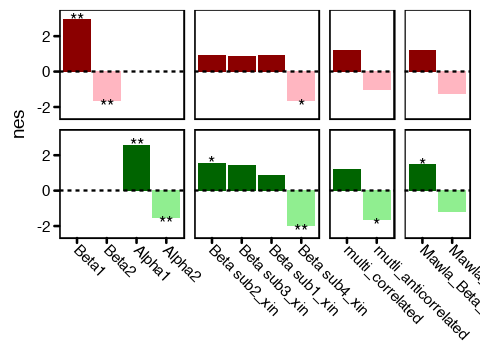

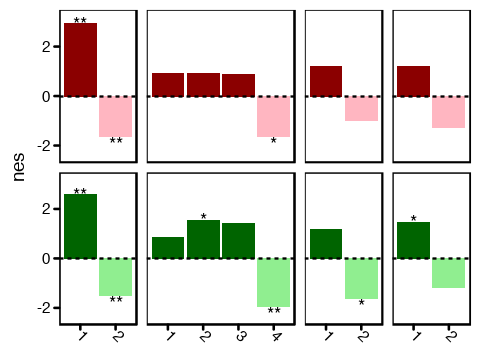

In [79]:
options(repr.plot.width = 4, repr.plot.height = 3)

p <- ggplot(pd.gsea, aes(Term, nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ glists, scales = "free_x", space = "free_x") + theme_pubr() + 
    scale_fill_manual(values = c("darkred", "lightpink", "darkgreen", "lightgreen", 
        "orange", "gold"), name = "celltype") + theme(strip.text = element_blank(), 
    legend.position = "none", legend.text = element_text(family = "Arial", size = 9), 
    legend.title = element_text(family = "Arial", size = 10), axis.title.x = element_blank(), 
    axis.text.x = element_text(angle = -45, hjust = 0, vjust = 0.5)) + geom_hline(yintercept = 0, 
    linetype = 2) + geom_text(data = pd.gsea.label, aes(label = label)) + ylim(-2.4, 
    3.2)
print(p)

options(repr.plot.width = 4, repr.plot.height = 3)

p <- ggplot(pd.gsea, aes(as.factor(x), nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ glists, scales = "free_x", space = "free_x") + theme_pubr() + 
    scale_fill_manual(values = c("darkred", "lightpink", "darkgreen", "lightgreen"), 
        name = "celltype") + theme(strip.text = element_blank(), legend.position = "none", 
    legend.text = element_text(family = "Arial", size = 9), legend.title = element_text(family = "Arial", 
        size = 10), axis.title.x = element_blank(), axis.text.x = element_text(angle = -45, 
        hjust = 0, vjust = 0.5)) + geom_hline(yintercept = 0, linetype = 2) + geom_text(data = pd.gsea.label, 
    aes(label = label)) + ylim(-2.4, 3.2)
print(p)
ggsave(p + theme(axis.title = element_blank(), axis.text.x = element_blank()), filename = "~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.2b.ab.GSEA.pdf", 
    , width = 3, height = 3)

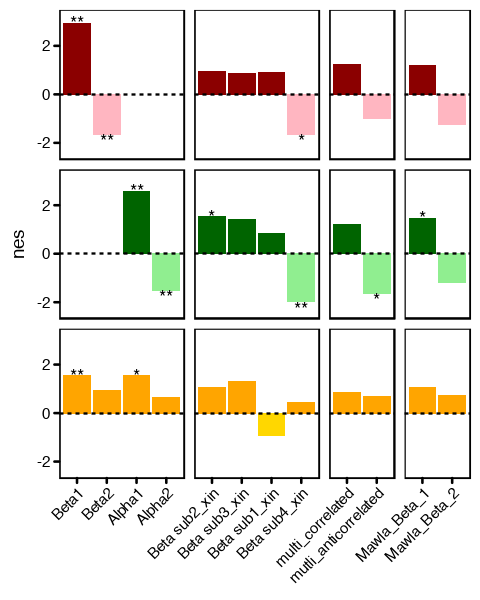

In [94]:
pd.gsea <- pd.gsea %>% rbind(fread("../dat/figdata/GSEA_delta_res_final.csv") %>% 
    mutate(celltype = "delta") %>% arrange(Term, celltype) %>% mutate(x = c(1, 2, 
    1, 2, 3, 4, 1, 2, 1, 2, 1, 2)) %>% mutate(cate = ifelse(nes > 0, 1, 2), label = ifelse(fdr <= 
    0.01, "**", ifelse(fdr <= 0.1, "*", ""))) %>% unite(cate, c("celltype", "cate"), 
    sep = "_", remove = F) %>% mutate(glists = c(rep("ours", 2), rep("Xin", 4), rep("ours", 
    2), rep(c("Mawla", "Patchseq"), each = 2))))
pd.gsea.label <- pd.gsea %>% mutate(nes = ifelse(nes < 0, nes - 0.3, nes))
options(repr.plot.width = 4, repr.plot.height = 5)

p <- ggplot(pd.gsea, aes(Term, nes)) + geom_bar(aes(fill = cate), stat = "identity") + 
    facet_grid(celltype ~ glists, scales = "free_x", space = "free_x") + theme_pubr() + 
    scale_fill_manual(values = c("darkred", "lightpink", "darkgreen", "lightgreen", 
        "orange", "gold"), name = "celltype") + theme(strip.text = element_blank(), 
    legend.position = "none", legend.text = element_text(family = "Arial", size = 9), 
    legend.title = element_text(family = "Arial", size = 10), axis.title.x = element_blank(), 
    axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1)) + geom_hline(yintercept = 0, 
    linetype = 2) + geom_text(data = pd.gsea.label, aes(label = label)) + ylim(-2.4, 
    3.2)
print(p)
ggsave(p, filename = "~/Dropbox (UCSD_Epigenomics)/workReports/2019-10_islet_rev/Fig1.rev.candid/Fig.2b.abd.GSEA.pdf", 
    , width = 3, height = 4)

## 1.4 prom pseudostate heatmap

In [ ]:
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps.Rds')
for (i in 1:8) fwrite(pd.fig2_prom_beta_ps$pd.enrichr.res[[i]]%>%arrange(P.value),paste0("beta_c",i,".csv"))

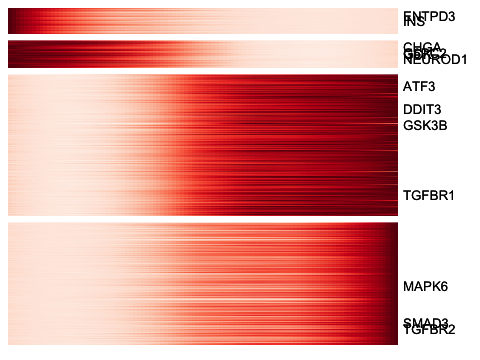

In [4]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps2.Rds')

feature.glist <- list(alpha = list(alpha1 = c("CHGA", "GCG", "GCK", "NEUROD1", "RFX6"), 
    alpha2 = c("PCNA", "CCND3", "CCNE2", "E2F1")), beta = list(beta2 = c("ATF3", 
    "DDIT3", "FOXO1.", "TGFBR1", "TGFBR2", "SMAD3", "GSK3B", "MAPK6"), beta1 = c("INS", 
    "CHGA", "G6PC2", "GCK", "RFX4", "NEUROD1", "ENTPD3")))

options(repr.plot.width=4, repr.plot.height=3)
row_labels<-(pd.fig2_prom_beta_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$beta$beta1 & `.` %in% 1:2, gene, ifelse(gene %in% 
        feature.glist$beta$beta2 & `.` %in% 3:4, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_beta_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_beta_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
#pdf("fig_2B.prom_ps_heatmap_beta2.pdf",height = 3,width = 4,family = "Arial")
#print(p)
#dev.off()

In [21]:
fwrite(pd.fig2_prom_beta_ps$pd.hm %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    mutate(clust = pd.fig2_prom_beta_ps$pd.ord),"/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s.prom_beta_ps_4clusters/fig_2C.prom_ps_heatmap_beta2.csv")


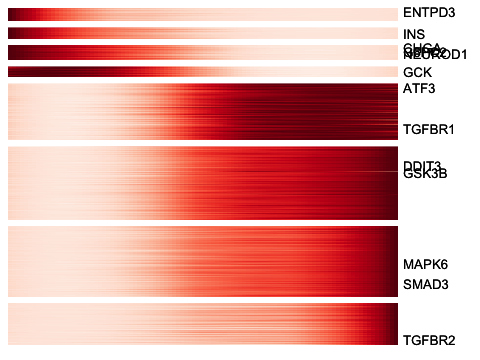

In [33]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_beta_ps<- readRDS('../dat/figdata/fig2_prom_beta_ps.Rds')

options(repr.plot.width=4, repr.plot.height=3)
row_labels<-(pd.fig2_prom_beta_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$beta$beta1 & `.` %in% 1:4, gene, ifelse(gene %in% 
        feature.glist$beta$beta2 & `.` %in% 5:8, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_beta_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_beta_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
#pdf("fig_2B.prom_ps_heatmap_beta.pdf",height = 3,width = 4,family = "Arial")
#print(p)
#dev.off()

fwrite(pd.fig2_prom_beta_ps$pd.hm %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    mutate(clust = pd.fig2_prom_beta_ps$pd.ord),"/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s.prom_beta_ps_8clusters/fig_2B.prom_ps_heatmap_beta.csv")


pdf 
  2

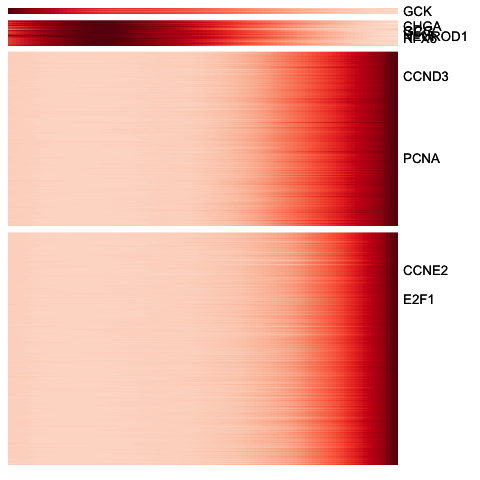

In [23]:
#saveRDS(object = list(pd.hm = dat.sub.2.scale[names(final.ord)[order(final.ord)], ], pd.ord = final.ord, 
#    pd.enrichr.res = pk.list.gene.enrichr),file='../dat/figdata/fig2_prom_alpha_ps.Rds')
pd.fig2_prom_alpha_ps<- readRDS('../dat/figdata/fig2_prom_alpha_ps.Rds')

options(repr.plot.width=4, repr.plot.height=4)
row_labels<-(pd.fig2_prom_alpha_ps$pd.ord %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    separate(gene_tr.idx, into = c("gene", "tr.idx"), remove = F, sep = "_") %>% 
    mutate(labels = ifelse(gene %in% feature.glist$alpha$alpha1 & `.` %in% 1:2, gene, ifelse(gene %in% 
        feature.glist$alpha$alpha2 & `.` %in% 3:4, gene, ""))))$labels

p<-pheatmap(pd.fig2_prom_alpha_ps$pd.hm,color = colorRampPalette(brewer.pal(n = 9,name = "Reds"))(100),
         gaps_row = as.numeric(cumsum(table(pd.fig2_prom_alpha_ps$pd.ord))),
         scale="none",cluster_rows = F,cluster_cols = F,
         labels_row=(row_labels),fontsize=8,border_color=NA,
         show_rownames = T,show_colnames = F,legend=F)
print(p)
#pdf("fig_2B.prom_ps_heatmap_alpha.pdf",height = 4,width = 4,family = "Arial")
#print(p)
#dev.off()

fwrite(pd.fig2_prom_alpha_ps$pd.hm %>% as.data.frame() %>% rownames_to_column("gene_tr.idx") %>% 
    mutate(clust = pd.fig2_prom_alpha_ps$pd.ord),"/Users/frank/Dropbox (UCSD_Epigenomics)/Islet_snATAC/panel_pdfs/sfigs/fig_s.prom_alpha_ps_cluster/fig_2C.prom_ps_heatmap_alpha.csv")


In [6]:

for (i in 1:8) {
    pd <- pd.fig2_prom_beta_ps$pd.enrichr.res[[i]] %>%separate(Overlap, into = c("n.hit","n.all"),sep = '/',convert =T)%>%
        filter(n.all<=150& Adjusted.P.value<0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    #print(p)
    ggsave(p,filename =paste0("fig_s.prom_beta_c",i,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}


In [391]:
for (i in 1:4) {
    pd <- pd.fig2_prom_alpha_ps$pd.enrichr.res[[i]] %>%separate(Overlap, into = c("n.hit","n.all"),sep = '/',convert =T)%>%
        filter(n.all<=150& Adjusted.P.value<0.1) %>% arrange(desc(Adjusted.P.value)) %>% 
        top_n(-10, Adjusted.P.value)
    
    l <- nrow(pd)
    d <- 80
    options(repr.plot.width = 4, repr.plot.height = l/3)
    p <- ggplot(pd %>% mutate(Term = factor(stringr::str_wrap(Term, d), levels = (stringr::str_wrap(Term, 
        d)))), aes(Term, -log(Adjusted.P.value))) + geom_bar(stat = "identity", fill = "grey80") + 
        coord_flip(expand = F) + theme_pubr() + theme(axis.text.y = element_blank(), 
        panel.border = element_rect(colour = NA), axis.line = element_line(colour = "black")) + 
        geom_text(aes(label = Term), y = 0.05, hjust = 0, color = "black", size = 2.5)
    #print(p)
    ggsave(p,filename =paste0("fig_s.prom_alpha_c",i,"_GOBP.pdf"), width = 4, height = l/3, 
    useDingbats = F)
}